## Observations and Insights 

**1. Even Sample Size and Gender Distribution to ensure consistency in results.**
*    From the bar graph, there are approximately 25 mice for each of the ten drug regimens.
*    From the pie chart, there is almost a 50% distribution amongst the male and female mice..

**2.	Capomulin and Ramicane are the most effective drugs in reducing the tumor size.**
*    All mice had a tumor size of 45 mm3 on Day 0.
* 	 Based on the box plot diagram, some of the mice tumor size reduced to approximately 25mm3 and 22mm3 for Capomulin and     
     Ramicane respectively.
     
**3.	There is a positive correlation between the tumor size and weight for Capomulin.**
* 	The correlation coefficient is 0.84 which shows when the weight increases, the tumor size increases too.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_results

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [2]:
# Checking the number of mice.
mice_number = len(mouse_study_results['Mouse ID'].unique())
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = mouse_study_results.loc[mouse_study_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_detail = mouse_study_results[mouse_study_results.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse_detail

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_dataframe = mouse_study_results[mouse_study_results['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_mouse_dataframe

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_number_new = len(clean_mouse_dataframe['Mouse ID'].unique())
mice_number_new

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_stats_group = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
tumor_stats_group = tumor_stats_group.rename(columns={'Tumor Volume (mm3)': 'Mean'})
tumor_stats_group["Median"] = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
tumor_stats_group["Variance"] = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
tumor_stats_group["Standard Deviation"] = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
tumor_stats_group["SEM"] = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

# Output of summary statistics table
tumor_stats_group

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats_agg = clean_mouse_dataframe.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ['mean', 'median','var', 'std', 'sem']})


# Rename columns
tumor_stats_agg = tumor_stats_agg.rename(columns={'mean': 'Mean',
                                                  'median': 'Median',
                                                  'var': 'Variance',
                                                  'std': 'Standard Deviation',
                                                  'sem': 'SEM'
                                                 })

# Output of summary statistics in aggregate method
tumor_stats_agg 

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.320930  50.446266  43.852013           6.622085   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

In [9]:
#Create a dataframe that counts the unique value of mice by drug regimen
mice_count_by_regimen = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen")["Mouse ID"].nunique())
mice_count_by_regimen


Mouse ID
Drug Regimen          
Capomulin           25
Ceftamin            25
Infubinol           25
Ketapril            25
Naftisol            25
Placebo             25
Propriva            24
Ramicane            25
Stelasyn            24
Zoniferol           25

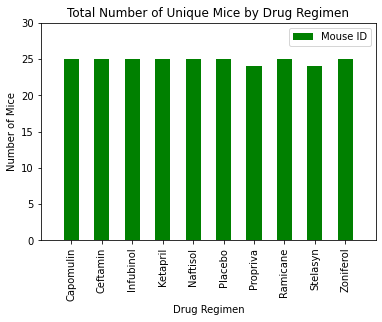

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas. 
mice_count_by_regimen.plot(kind="bar", facecolor="green")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title("Total Number of Unique Mice by Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xlim(-1, len(mouse_study_results['Drug Regimen'].unique()))
plt.ylim(0, 30)

# Output of bar plot of unique mice by drug regimen
plt.show()

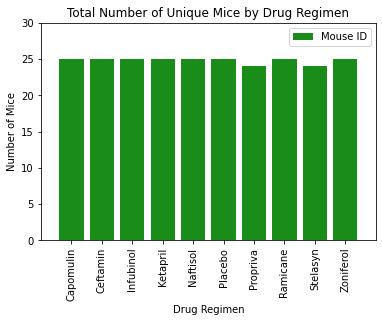

In [11]:
# Create list from mice_count_by_regimen dataframe
drug_regimen = mice_count_by_regimen.index.tolist()
mouse = mice_count_by_regimen["Mouse ID"].tolist()

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(drug_regimen, mouse, color='green', align="center", alpha=0.9, label="Mouse ID")

# Formatting the scatter diagram with title, x & y labels, and x & y limits, legends, and x ticks
plt.title("Total Number of Unique Mice by Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xlim(-1, len(mouse_study_results['Drug Regimen'].unique()))
plt.ylim(0, 30)
plt.legend(loc="best")
plt.xticks(rotation=90)


# Output of bar plot of unique mice by drug regimen
plt.show()

In [12]:
#Count the number of females and males of mice in the test
gender_by_regimen = pd.DataFrame(clean_mouse_dataframe.groupby("Sex")["Mouse ID"].nunique())

gender_by_regimen

Mouse ID
Sex             
Female       123
Male         125

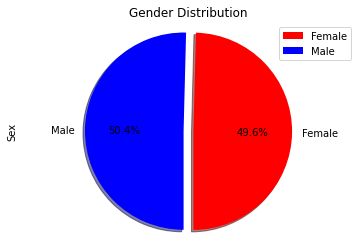

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_by_regimen.plot(kind="pie", y='Mouse ID', autopct='%1.1f%%',colors = ('red', 'blue'), title=("Gender Distribution"), shadow = True, explode = [0,0.1], startangle = 270)

# Formating the pie plot with an equal axis, y label and providing a legend
plt.axis("equal")
plt.ylabel("Sex")
plt.legend(loc="best")

#Output of Pie Plot of Gender Distrubution
plt.show()

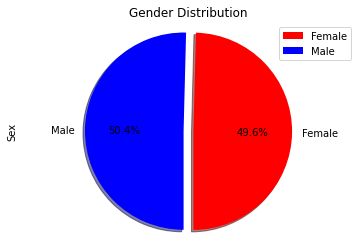

In [14]:
# Creating dataset from gender by regimen to create pie plot
gender= gender_by_regimen.index.tolist()
gender_count = gender_by_regimen["Mouse ID"].tolist()  

# Creating explode data 
explode = (0, 0.1) 
  
# Creating color parameters 
colors = ( "red", "blue") 

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, labels = gender, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270) 

# Formating the title, equal axis, y label and legend
plt.title("Gender Distribution")
plt.axis("equal")
plt.ylabel("Sex")
plt.legend(loc="best")

#Output of Pie Plot of Gender Distrubution
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse 
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_last_timepoint = clean_mouse_dataframe.drop_duplicates(subset='Mouse ID', keep="last")

#Filter for the 4 treatment regimens
tumor_last_timepoint_best_regimen = tumor_last_timepoint[(tumor_last_timepoint["Drug Regimen"] == "Capomulin")|
                                  (tumor_last_timepoint["Drug Regimen"] == "Ramicane")|
                                  (tumor_last_timepoint["Drug Regimen"] == "Infubinol")|
                                  (tumor_last_timepoint["Drug Regimen"] == "Ceftamin")]

#Output of the 4 treatmen regiemns dataframe
tumor_last_timepoint_best_regimen


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9        k403     Ramicane    Male          21          16         45   
19       s185    Capomulin  Female           3          17         45   
29       x401    Capomulin  Female          16          15         45   
39       m601    Capomulin    Male          22          17         45   
49       g791     Ramicane    Male          11          16         45   
...       ...          ...     ...         ...         ...        ...   
1797     x822     Ceftamin    Male           3          29         45   
1813     y163    Infubinol  Female          17          27         45   
1845     y769     Ceftamin  Female           6          27         45   
1855     y865     Ceftamin    Male          23          26         45   
1872     z581    Infubinol  Female          24          25         45   

      Tumor Volume (mm3)  Metastatic Sites  
9              22.050126                 1  
19             23.343598                 1  
29             28.484033                 0  
39             28.430964                 1  
49             29.128472                 1  
...                  ...               ...  
1797           61.386660                 3  
1813           67.685569                 3  
1845           68.594745                 4  
1855           64.729837                 3  
1872           62.754451                 3  

[100 rows x 8 columns]

In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = []
for item in tumor_last_timepoint_best_regimen['Drug Regimen']:
     if not item in treatment_list:
        treatment_list.append(item)
treatment_list.sort()

# Create empty list to fill with tumor vol data (for plotting)
tumor_list_by_drug=[]

# Output for data lists for boxplots
print(treatment_list)
print(tumor_list_by_drug)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
[]


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers by drug regimen

# Filter Dataset by drug regimen
capomulin_df = tumor_last_timepoint.loc[(tumor_last_timepoint["Drug Regimen"] == "Capomulin")]
ceftamin_df = tumor_last_timepoint.loc[(tumor_last_timepoint["Drug Regimen"] == "Ceftamin")]
infubinol_df = tumor_last_timepoint.loc[(tumor_last_timepoint["Drug Regimen"] == "Infubinol")]
ramicane_df = tumor_last_timepoint.loc[(tumor_last_timepoint["Drug Regimen"] == "Ramicane")]

# Calculate Quartilies by drug regimen to get the Interquartile range
quartiles_capomulin =capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles_ceftamin =ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles_infubinol =infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles_ramicane =ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])


# Calculate Interquartile Range = quartiles(.75) - quartiles(.25) by drug regimen

IQR_capomulin =quartiles_capomulin[.75]-quartiles_capomulin[.25]
IQR_ceftamin =quartiles_ceftamin[.75]-quartiles_ceftamin[.25]
IQR_infubinol =quartiles_infubinol[.75]-quartiles_infubinol[.25]
IQR_ramicane =quartiles_ramicane[.75]-quartiles_ramicane[.25]

# Calculate the upper and lower bounds to define the outliers
# Lower Bound = quartile(.25) - (1.5 * IQR)
# Upper Bound = quartile(.75) + (1.5 * IQR)

lower_capomulin = quartiles_capomulin[.25] - (1.5*IQR_capomulin)
upper_capomulin = quartiles_capomulin[.75] + (1.5*IQR_capomulin)

lower_ceftamin = quartiles_ceftamin[.25] - (1.5*IQR_ceftamin)
upper_ceftamin = quartiles_ceftamin[.75] + (1.5*IQR_ceftamin)

lower_infubinol = quartiles_infubinol[.25] - (1.5*IQR_infubinol)
upper_infubinol = quartiles_infubinol[.75] + (1.5*IQR_infubinol)

lower_ramicane = quartiles_ramicane[.25] - (1.5*IQR_ramicane)
upper_ramicane = quartiles_ramicane[.75] + (1.5*IQR_ramicane)


#Display Output for quartiles and interquartiles by drug regimen
print("Capomulin Quartiles")
print(quartiles_capomulin)
print(" ")
print(f"Capomulin IQR {IQR_capomulin}")
print(" ")
print("Ceftamin Quartiles")
print(quartiles_ceftamin)
print(" ")
print(f"Ceftamin IQR {IQR_ceftamin}")
print(" ")
print("Infubinol Quartiles")
print(quartiles_infubinol)
print(" ")
print(f"Infubinol IQR {IQR_infubinol}")
print(" ")
print("Ramicane Quartiles")
print(quartiles_ramicane)
print(" ")
print(f"Ramicane IQR {IQR_ramicane}")



Capomulin Quartiles
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
 
Capomulin IQR 7.781863460000004
 
Ceftamin Quartiles
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
 
Ceftamin IQR 15.577752179999997
 
Infubinol Quartiles
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
 
Infubinol IQR 11.477135160000003
 
Ramicane Quartiles
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
 
Ramicane IQR 9.098536719999998


In [18]:
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_last_timepoint_grouped=tumor_last_timepoint_best_regimen.groupby('Drug Regimen')
tumor_last_timepoint_grouped=tumor_last_timepoint_grouped.groups  
print(tumor_last_timepoint_grouped)



{'Capomulin': Int64Index([  19,   29,   39,   64,  104,  124,  134,  144,  164,  204,  224,
             244,  282,  299,  309,  317,  337,  340,  350,  360,  370,  380,
             390,  440, 1455],
           dtype='int64'), 'Ceftamin': Int64Index([ 493,  594,  600,  617,  840,  940,  993, 1033, 1112, 1119, 1122,
            1132, 1162, 1260, 1379, 1406, 1551, 1582, 1583, 1670, 1743, 1773,
            1797, 1845, 1855],
           dtype='int64'), 'Infubinol': Int64Index([ 463,  473,  530,  540,  637,  669,  742,  800,  834,  949, 1053,
            1076, 1205, 1225, 1312, 1314, 1397, 1485, 1616, 1632, 1640, 1683,
            1726, 1813, 1872],
           dtype='int64'), 'Ramicane': Int64Index([  9,  49,  59,  74,  84,  94, 114, 154, 174, 184, 194, 214, 234,
            254, 262, 272, 289, 327, 400, 410, 420, 430, 447, 449, 453],
           dtype='int64')}


In [19]:
# add subset of tumor volume of unique mice to the empty list by drug regimen in the list "tumor_list_by_drug" 
tumor_list_by_drug = tumor_last_timepoint_best_regimen.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
print(tumor_list_by_drug)

Drug Regimen
Capomulin    [23.34359787, 28.48403281, 28.43096411, 30.485...
Ceftamin     [62.99935619, 45.0, 56.05774909, 55.74282869, ...
Infubinol    [67.97341878, 65.52574285, 57.03186187, 66.083...
Ramicane     [22.05012627, 29.12847181, 30.27623175, 30.564...
Name: Tumor Volume (mm3), dtype: object


In [20]:
# Determine outliers using upper and lower bounds

outlier_capomulin = capomulin_df.loc[(capomulin_df['Tumor Volume (mm3)'] < lower_capomulin) | (capomulin_df['Tumor Volume (mm3)'] > upper_capomulin)]
outlier_ceftamin = ceftamin_df.loc[(ceftamin_df['Tumor Volume (mm3)'] < lower_ceftamin) | (ceftamin_df['Tumor Volume (mm3)'] > upper_ceftamin)]
outlier_infubinol = infubinol_df.loc[(infubinol_df['Tumor Volume (mm3)'] < lower_infubinol) | (infubinol_df['Tumor Volume (mm3)'] > upper_infubinol)]
outlier_ramicane = ramicane_df.loc[(ramicane_df['Tumor Volume (mm3)'] < lower_ramicane) | (ramicane_df['Tumor Volume (mm3)'] > upper_ramicane)]

# Count of outliers per drug regimen
outlier_capomulin_count = len(outlier_capomulin['Tumor Volume (mm3)'])
outlier_ceftamin_count = len(outlier_ceftamin['Tumor Volume (mm3)'])
outlier_infubinol_count = len(outlier_infubinol['Tumor Volume (mm3)'])
outlier_ramicane_count = len(outlier_ramicane['Tumor Volume (mm3)'])

# Display output to determine where the outliers are (if any)

print(f"Capomulin potential outliers could be values below {lower_capomulin} and above {upper_capomulin} could be outliers.")
print(f"Capomulin outliers is {outlier_capomulin_count}")

print(f"Ceftamin potential outliers could be values below {lower_ceftamin} and above {upper_ceftamin} could be outliers.")
print(f"Ceftamin outliers is {outlier_ceftamin_count}")

print(f"Infubinol potential outliers could be values below {lower_infubinol} and above {upper_infubinol} could be outliers.")
print(f"Infubinol outliers is {outlier_infubinol_count}")

print(f"Ramicane potential outliers could be values below {lower_ramicane} and above {upper_ramicane} could be outliers.")
print(f"Ramicane outliers is {outlier_ramicane_count}")



Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
Capomulin outliers is 0
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.
Ceftamin outliers is 0
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Infubinol outliers is 1
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Ramicane outliers is 0


In [21]:
#The above output shows there is 1 outlier in Infubinol.  The details of the outlier is as follows.
outlier_infubinol

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
669     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  
669           36.321346                 0

<function matplotlib.pyplot.show(*args, **kw)>

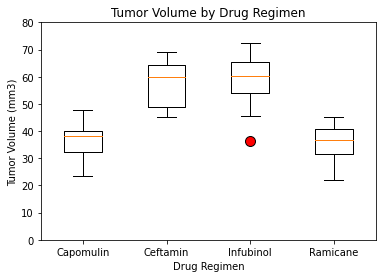

In [22]:
# Format the Outliers
flierprops = dict(marker='o', markerfacecolor='red', markersize=10,
                  linestyle='none', markeredgecolor='black')

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_list_by_drug, labels = treatment_list, flierprops = flierprops)

# Format the title, x & y label, and y limit
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.ylim(0,80)

# Output of Box Plot of 4 drug regimen
plt.show



## Line and Scatter Plots

19    s185
Name: Mouse ID, dtype: object


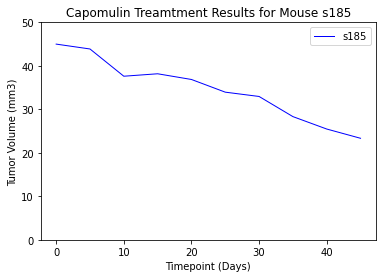

In [23]:
# Pick mouse treated with Capomulin from capomulin_df
print(capomulin_df["Mouse ID"].head(1))

# Results show Mouse ID s185 os treated wotj Capomulin, so we extract all the data from clean_mouse_dataframe
s185_df = clean_mouse_dataframe.loc[(clean_mouse_dataframe["Mouse ID"] == "s185")]

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(s185_df.iloc[:, 5], s185_df.iloc[:, 6], color="blue", linewidth=1, label="s185")

# Format the title, x & y label, y limit and legend
plt.title ("Capomulin Treamtment Results for Mouse s185")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")
plt.ylim(0, 50)
plt.legend(loc="best")

# Output of line plot tumor volume vs. time point for a mouse s185
plt.show()



In [24]:
# Retrieve all data related to Capomulin from clean mouse dataframe
capomulin_all_data = clean_mouse_dataframe.loc[(clean_mouse_dataframe["Drug Regimen"] == "Capomulin")]

# Group by Drug Regimen and Mouse ID To obtain weight and average tumor volume info
capomulin_average = capomulin_all_data.groupby(["Drug Regimen", "Mouse ID"]).mean()
capomulin_average


Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Drug Regimen Mouse ID                                                          
Capomulin    b128             9.0        22.0       22.5           41.963636   
             b742             7.0        21.0       22.5           40.083699   
             f966            16.0        17.0       10.0           36.505973   
             g288             3.0        19.0       22.5           41.990097   
             g316            22.0        22.0       22.5           44.613344   
             i557             1.0        24.0       22.5           44.805810   
             i738            23.0        20.0       22.5           39.141053   
             j119             7.0        23.0       22.5           44.465236   
             j246            21.0        21.0       17.5           43.216925   
             l509            17.0        21.0       22.5           44.434474   
             l897            17.0        19.0       22.5           42.507261   
             m601            22.0        17.0       22.5           34.847470   
             m957             3.0        19.0       22.5           39.049816   
             r157            22.0        25.0        7.5           45.798970   
             r554             8.0        17.0       22.5           36.509212   
             r944            12.0        25.0       22.5           43.367364   
             s185             3.0        17.0       22.5           34.559143   
             s710             1.0        23.0       22.5           42.803733   
             t565            20.0        17.0       22.5           39.328725   
             u364            18.0        17.0       22.5           39.887495   
             v923            19.0        21.0       22.5           41.581595   
             w150            23.0        23.0        5.0           41.384825   
             w914            24.0        21.0       22.5           41.352452   
             x401            16.0        15.0       22.5           36.182040   
             y793            17.0        17.0       22.5           38.506829   

                       Metastatic Sites  
Drug Regimen Mouse ID                    
Capomulin    b128                  0.70  
             b742                  0.00  
             f966                  0.00  
             g288                  0.80  
             g316                  1.00  
             i557                  0.20  
             i738                  0.60  
             j119                  0.60  
             j246                  0.25  
             l509                  1.40  
             l897                  0.40  
             m601                  0.90  
             m957                  0.90  
             r157                  0.00  
             r554                  2.20  
             r944                  0.90  
             s185                  0.40  
             s710                  0.60  
             t565                  0.00  
             u364                  1.80  
             v923                  0.90  
             w150                  0.00  
             w914                  0.50  
             x401                  0.00  
             y793                  1.40

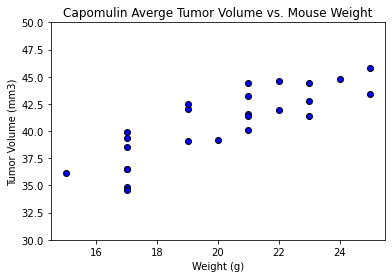

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulin_average.iloc[:,1], capomulin_average.iloc[:,3], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("Capomulin Averge Tumor Volume vs. Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylim(30,50)

# Output of scatter plot
plt.show()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model
#for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_average.iloc[:,1], capomulin_average.iloc[:,3])[0]   
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_average.iloc[:,1], capomulin_average.iloc[:,3])  

# Output of correlation coefficient and linear regression model
print(f"The correlation coefficient between weight and tumor volume for the Capomulin regimen is {round(correlation,2)}")
print(f"slope = {round(slope,2)}, intercept = {round(intercept,2)}, r-value = {round(rvalue, 2)}, p-value = {round(pvalue,2)}, standard error = {round(stderr,2)}")
                          
                          

The correlation coefficient between weight and tumor volume for the Capomulin regimen is 0.84
slope = 0.95, intercept = 21.55, r-value = 0.84, p-value = 0.0, standard error = 0.13


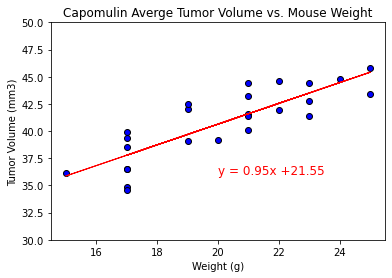

In [27]:
# Calculate the values for the regression line (y=mx+b)
best_fit = slope * capomulin_average.iloc[:,1] + intercept

# Format the regression line formula to be displayed on the graph
best_fit_equation = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Plot scatter diagram
plt.scatter(capomulin_average.iloc[:,1], capomulin_average.iloc[:,3], marker="o", facecolors="blue", edgecolors="black")
# Plot regression line
plt.plot(capomulin_average.iloc[:,1],best_fit,linewidth = 1,color="red")
# Plot regression formula on graph
plt.annotate(best_fit_equation, (20, 36), fontsize=12, color='red')

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("Capomulin Averge Tumor Volume vs. Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylim(30,50)

# Output of scatter diagram with linear regression model
plt.show()